Import important packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

Uploading the data

In [3]:
dirty_data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Github_repos//Data_Analysis_With_Dirty_Data//messy_data.csv", sep = ';', encoding='latin-1')

Tranform into DataFrame to handle the data more easily

In [4]:
df = pd.DataFrame(dirty_data)

In [35]:
df

,IMBD_title_ID,Original_title,Release_year,Duration,Country,Content_Rating,Director,Income,Votes,Score,Genre1,Genre2,Genre3
0,tt0111161,The Shawshank Redemption,1995-02-10,142,USA,R,Frank Darabont,28815245,2278845,9.3,Drama,None,None
1,tt0068646,The Godfather,1972-09-21,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2,Crime,Drama,None
2,tt0468569,The Dark Knight,2008-07-23,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0,Action,Crime,Drama
3,tt0071562,The Godfather: Part II,1975-09-25,220,USA,R,Francis Ford Coppola,408035783,1098714,9.0,Crime,Drama,None
4,tt0110912,Pulp Fiction,1994-10-28,0,USA,R,Quentin Tarantino,222831817,1780147,8.9,Crime,Drama,None
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,201,New Zealand,PG-13,Peter Jackson,1142271098,1604280,8.9,Action,Adventure,Drama
6,tt0108052,Schindler's List,1994-03-11,0,USA,R,Steven Spielberg,322287794,1183248,8.9,Biography,Drama,History
7,tt0050083,12 Angry Men,1957-09-04,96,USA,Not Rated,Sidney Lumet,576,668473,8.9,Crime,Drama,None
8,tt1375666,Inception,2010-09-24,148,USA,PG-13,Christopher Nolan,869784991,2002816,8.8,Action,Adventure,Sci-Fi
9,tt0137523,Fight Club,1999-10-29,0,UK,R,David Fincher,101218804,1807440,8.8,Drama,None,None


In [5]:
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


**USEFUL INFORMATIONS OF DATA**

In [6]:
df.shape

(101, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original titlÊ  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genrë¨          100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10   Votes          100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


In [8]:
df.index

RangeIndex(start=0, stop=101, step=1)

**DATA CLEANING**

Rename the columns to more appropriate names

In [9]:
df.columns

Index(['IMBD title ID', 'Original titlÊ', 'Release year', 'Genrë¨', 'Duration',
       'Country', 'Content Rating', 'Director', 'Unnamed: 8', 'Income',
       ' Votes ', 'Score'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(" ", "_")

In [11]:
df.rename(
    columns = {
        "Original_titlÊ" : "Original_title",
        'Genrë¨' : 'Genre',
        "_Votes_" : "Votes"
    },
inplace = True    
)

The column **Unnamed: 8** has NULL values so we must drop it!

In [12]:
df.drop(["Unnamed:_8"], axis = 1, inplace = True)

Also we are going to drop NULL rows

In [13]:
df.dropna(thresh = 11,inplace = True)

The **dirty_data** has some error values in columns so we must fix it!

1. We begin with **Score** column

In [14]:
df.at[2, 'Score'] = 9.0
df.at[3, 'Score'] = 9.0
df.at[4, 'Score'] = 8.9
df.at[5, 'Score'] = 8.9
df.at[8, 'Score'] = 8.8
df.at[10, 'Score'] = 8.8
df.at[15, 'Score'] = 8.7
df.at[16, 'Score'] = 8.7

2. We continue with **Release_year** column

In [15]:
df.loc[83, 'Release_year'] = '1983-01-12'

In [16]:
df.loc[84, 'Release_year'] = '1976-02-09'

In [17]:
df['Release_year'] = pd.to_datetime(df.Release_year)

C:\Users\xrist\AppData\Local\Temp\ipykernel_10112\943627111.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Release_year'] = pd.to_datetime(df.Release_year)


3. Next is the column **Duration**

In [18]:
df['Duration'] = df['Duration'].replace(" ", 0)
df['Duration'] = df['Duration'].replace('178c', 178)
df['Duration'] = df['Duration'].replace("Inf", 0)
df['Duration'] = df['Duration'].replace("Nan", 0)
df['Duration'] = df['Duration'].replace("-", 0)
df['Duration'] = df['Duration'].replace("Not Applicable", 0)

4. Column **Income**

In [19]:
df.loc[3, 'Income'] = "$ 408035783"

In [20]:
df['Income'] = df['Income'].astype('string')

In [21]:
df['Income'] = df['Income'].str.replace('$', '', regex = True)

In [22]:
df['Income'] = df['Income'].astype('int32')

5. We continue with column **Votes**

In [23]:
df['Votes'] = df['Votes'].astype('string')
df['Votes'] = df['Votes'].str.replace('.', '', regex = True)

In [24]:
df['Votes'] = df['Votes'].astype('int32')

We split the **Genre** column and later we drop it.

In [25]:
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.split(expand = True)

In [26]:
df.drop('Genre', axis = 1, inplace=True)

In [27]:
df['Genre1'] = df['Genre1'].astype('string')
df['Genre2'] = df['Genre2'].astype('string')
df['Genre3'] = df['Genre3'].astype('string')

In [28]:
df['Genre1'] = df['Genre1'].str.replace(',', '')
df['Genre2'] = df['Genre2'].str.replace(',', '')
df['Genre3'] = df['Genre3'].str.replace(',', '')

In [29]:
df[['Genre1', 'Genre2', 'Genre3']].fillna('None', inplace = True)

C:\Users\xrist\AppData\Local\Temp\ipykernel_10112\3600621952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Genre1', 'Genre2', 'Genre3']].fillna('None', inplace = True)


A wrong value for New Zealand & US

In [31]:
df.at[11, 'Country'] = 'New Zealand'
df.at[15, 'Country'] = 'New Zealand'
df.at[2, 'Country'] = 'USA'
df.at[24, 'Country'] = 'USA'

**Compute the mean, sum, range and other interesting statistics for numeric columns**

In [86]:
country_grp = df.groupby(by = df['Country'])

In [88]:
country_grp['Income'].agg(['median', 'mean'])

,median,mean
Country,,
Brazil,30680793.0,3.068079e+07
Denmark,15843274.0,1.584327e+07
France,173924742.0,1.739247e+08
Germany,199406315.5,1.994063e+08
Iran,22926076.0,2.292608e+07
Italy,12682696.0,1.268270e+07
Japan,169785629.0,1.751918e+08
New Zealand,951227416.0,9.938109e+08
South Korea,15002116.0,1.500212e+07


Total Income From All Countries

In [89]:
df['Income'].sum()

20812595154

**DATA FILTERING**

Sum of countries that the production is located

In [32]:
countries_sum = df['Country'].value_counts()

Text(0.5, 1.0, 'Countries that productions are located')

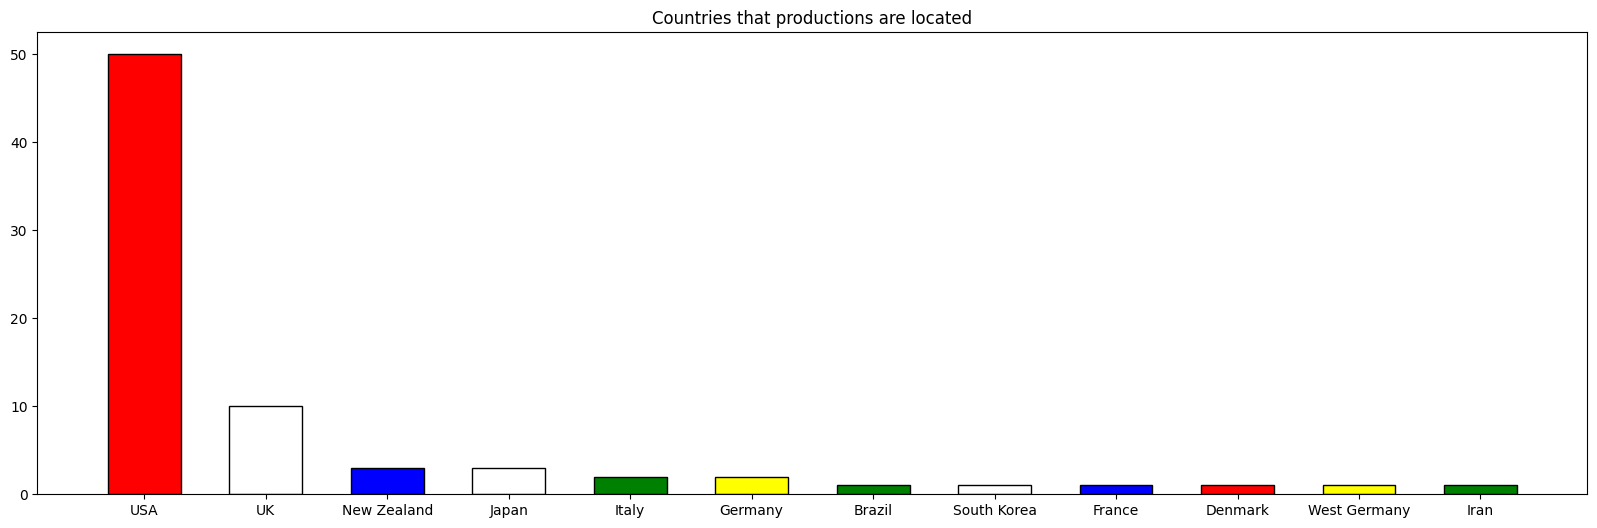

In [33]:
plt.figure(figsize = (20, 6))
color_list = ['red', 'white', 'blue', 'white', 'green', 'yellow', 'green', 'white', 'blue', 'red', 'yellow', 'green']
plt.bar(countries_sum.index, countries_sum, width = 0.6, color = color_list, edgecolor = 'black')
plt.title('Countries that productions are located')

**Top 10 Rated Movies**

In [40]:
top_10_rated = df[['Original_title', 'Score']].head(10)
top_10_rated

,Original_title,Score
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,Pulp Fiction,8.9
5,The Lord of the Rings: The Return of the King,8.9
6,Schindler's List,8.9
7,12 Angry Men,8.9
8,Inception,8.8
9,Fight Club,8.8


**Calculating the sum of Income that every country had from their native productions**

In [81]:
s = country_grp['Income'].apply(lambda x : x.sum())
s

Country
Brazil             30680793
Denmark            15843274
France            173924742
Germany           398812631
Iran               22926076
Italy              25365392
Japan             525575458
New Zealand      2981432817
South Korea        15002116
UK               1774433981
USA             14837110198
West Germany       11487676
Name: Income, dtype: int64

**The Max Income Is From USA**

In [82]:
s.max()

14837110198

**Q1:** Are the movies from 2000 and after better than 2000 and back?

-We will make a new column with the year of every movie that had been released

In [95]:
df['Year'] = pd.DatetimeIndex(df['Release_year']).year

-Change the type of column Score

In [104]:
df.at[21, 'Score'] = 8.6

In [105]:
df['Score'] = df['Score'].astype('float')

-The average score of movies before 2000 is 8.32

In [119]:
movies_before_2000 = df[df['Year'] < 2000]
average_score_before_2000 = movies_before_2000['Score'].mean()

-The average score of movies after 2000 is 8.26

In [118]:
movies_after_2000 = df[df['Year'] >= 2000]
average_score_after_2000 = movies_after_2000['Score'].mean()

-We make a small DataFrame with 2 columns

In [126]:
average_array = {
    'Average' : [average_score_before_2000, average_score_after_2000],
    'Year' : ['Before 2000', 'After 2000']
    }
avg_arr = pd.DataFrame(average_array)

-Visualise the conclusion

(8.0, 8.5)

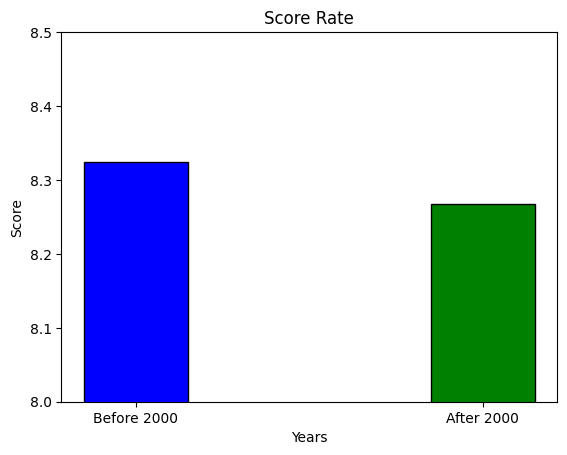

In [168]:
plt.bar(avg_arr['Year'], avg_arr['Average'], width = 0.3, edgecolor = 'black', color = ['blue', 'green'] )
plt.title('Score Rate')
plt.ylabel('Score')
plt.xlabel('Years')

#Display the y-axis values
plt.ylim(8, 8.5)

-We drop the year column

In [169]:
df.drop('Year', axis = 1, inplace= True)

**Answer:** Our hypothesis isn't right because the old movies are better than new!

**Q2:** Movies With Most Votes Are Also The Greatest Movies Based On Their Score Rate.

**Top 10 Most Voted Movies**

In [34]:
df.sort_values(by = 'Votes', ascending= False).head(10)

,IMBD_title_ID,Original_title,Release_year,Duration,Country,Content_Rating,Director,Income,Votes,Score,Genre1,Genre2,Genre3
0,tt0111161,The Shawshank Redemption,1995-02-10,142,USA,R,Frank Darabont,28815245,2278845,9.3,Drama,None,None
2,tt0468569,The Dark Knight,2008-07-23,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0,Action,Crime,Drama
8,tt1375666,Inception,2010-09-24,148,USA,PG-13,Christopher Nolan,869784991,2002816,8.8,Action,Adventure,Sci-Fi
9,tt0137523,Fight Club,1999-10-29,0,UK,R,David Fincher,101218804,1807440,8.8,Drama,None,None
4,tt0110912,Pulp Fiction,1994-10-28,0,USA,R,Quentin Tarantino,222831817,1780147,8.9,Crime,Drama,None
10,tt0109830,Forrest Gump,1994-10-06,142,USA,PG-13,Robert Zemeckis,678229452,1755490,8.8,Drama,Romance,None
11,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2002-01-18,178,New Zealand,PG-13,Peter Jackson,887934303,1619920,8.8,Action,Adventure,Drama
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,201,New Zealand,PG-13,Peter Jackson,1142271098,1604280,8.9,Action,Adventure,Drama
1,tt0068646,The Godfather,1972-09-21,175,USA,R,Francis Ford Coppola,246120974,1572674,9.2,Crime,Drama,None
50,tt1345836,The Dark Knight Rises,2012-08-29,164,UK,PG-13,Christopher Nolan,1081133191,1480582,8.3,Action,Adventure,None
